In [1]:
from src import esma

In [2]:
model = esma.project(project_id='MnTe_Wannier')

In [3]:
model.set_pseudo(path="/work/bansil/s.sevim/Test/espresso-machine/Pseudopotentials/PBE/US/SOC")

In [4]:
model.get_structure(format="poscar",path="/work/bansil/s.sevim/Test/espresso-machine/Structures/MnTe.poscar")

In [5]:
model.set_cores(64)
model.ecutwfc(100) #Set wavefunction cutoff
model.ecutrho(1000) #Set wavefunction cutoff
model.k_points([8,8,5]) #Set number of k points
model.degauss(0.01) #Set degauss value
model.conv_thr(1e-6) #Set convergence threshold
model.smearing('mv')
model.mixing_beta(0.2)
model.electron_maxstep(500) #Max number of electron iteration
model.exchange_maxstep(500) #Max number of exchange iteration
# model.etot_conv_thr(10**-4)
# model.forc_conv_thr(10**-3)

In [6]:
model.hubbard(atom='Mn',orbital='3d',value=3)
afm = model.magnetize(magnetic_atom='Mn',angle1=90,angle2=30)[1]

In [7]:
afm.soc()

In [8]:
afm.debug=True

In [9]:
afm.calculate('scf')

In [10]:
points = [
            ['GAMMA',0,0,0],
            ['M',0.5,0,0],
            ["M'",0.5,0,0.35],
            ["GAMMA'",0,0,0.35],
            ["K",0.33333,0.3333,0]
            ]

In [11]:
path = ['K','GAMMA','K'] #choose corners
afm.band_points(path,number=40,points=points) #define path
afm.calculate('bands',pp_core=32)

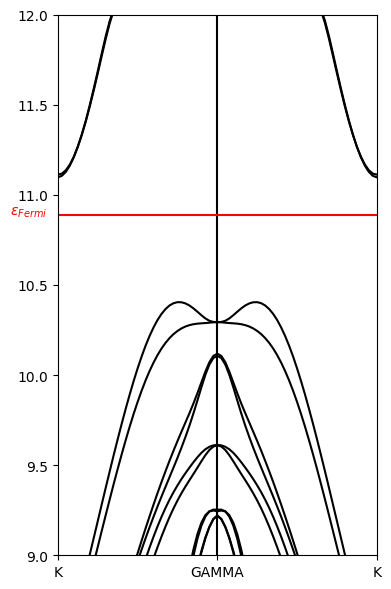

In [12]:
#Step 6 - Plotting
afm.plot('electron',ylim=[9,12],save=True,figsize=(4,6)) #plot electron bands

In [17]:
afm.debug=False

In [13]:
afm.scdm_mu(afm.fermi_energy())
afm.scdm_sigma(2)

In [14]:
afm.nbnd(88)

In [15]:
afm.k_points([12,12,8]) #Set number of k points
afm.calculate('scf')

In [16]:
afm.nosym(True)

In [17]:
afm.k_points([24,24,16],grid=True) #k mesh 
afm.calculate('nscf')

In [18]:
afm.debug=False

In [19]:
afm.calculate('wannier90')

wannier90 for afm1 is started
wannier90 for afm1 is finished


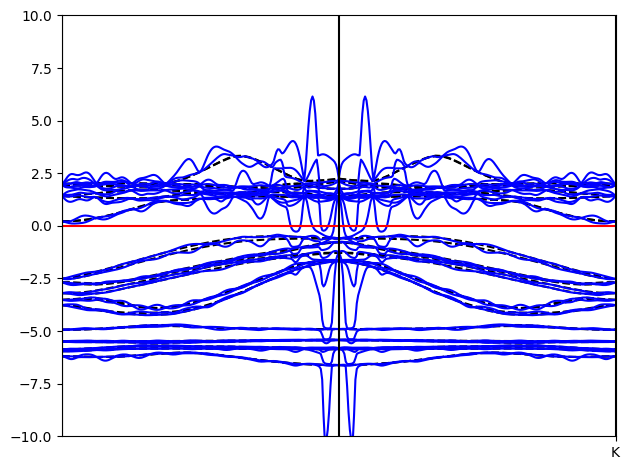

In [29]:
afm.plot(calculation='wannier90',ylim=[-10,10])

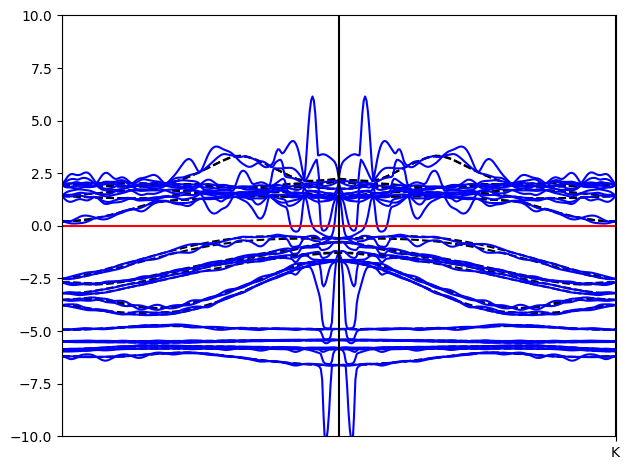

In [19]:
afm.plot(calculation='wannier90',ylim=[-10,10])

In [20]:
# path = ["M'","GAMMA'","M'"] #choose corners
# afm.band_points(path,number=40,points=points) #define path
# afm.calculate('bands',pp_core=32)

In [21]:
# #Step 6 - Plotting
# afm.plot('electron',ylim=[9,12],save=True,figsize=(4,6)) #plot electron bands